# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [3]:
print(cities[::20])

['mizusawa', 'kalaleh', 'puerto ayora', 'kuche', 'kavieng', 'sabang', 'obluche', 'mnogovershinnyy', 'longyearbyen', 'vestmannaeyjar', 'rocha', 'karakose', 'imbituba', 'auki', 'ucluelet', 'coquimbo', 'yulara', 'louisbourg', 'rapid valley', 'bull savanna', 'mount gambier', 'rudbar', 'saquarema', 'esna', 'yerbogachen', 'ginda', 'lisakovsk', 'khandbari', 'disa', 'kahului', 'jining', 'kieta']


### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls. Think: how do you do anything successively?
* Make sure each city in your dataset includes coordinates, country, max temperature, pressure, humidity and wind speed
* Use a try-except to handle errors (they will occur)
* Include a print log of each city as it'sbeing processed (with the city number and city name). City number is just going to count which city is being processed 


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
req = requests.get(base_url + f'&q={city}')
json_data = req.json()
print(json_data)

{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 33.46, 'feels_like': 22.01, 'temp_min': 33.46, 'temp_max': 33.46, 'pressure': 996, 'humidity': 93}, 'visibility': 4000, 'wind': {'speed': 19.57, 'deg': 230, 'gust': 33.38}, 'snow': {'1h': 0.19}, 'clouds': {'all': 75}, 'dt': 1635107677, 'sys': {'type': 1, 'id': 8303, 'country': 'AR', 'sunrise': 1635066095, 'sunset': 1635118371}, 'timezone': -10800, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}


In [22]:
city_weather = {'city':[],
                'cloudiness':[],
                'country':[],
                'date':[],
                'humidity':[],
                'lat':[],
                'lng':[],
                'max temperature':[],
                'wind speed':[]}

for index, city in enumerate(cities, start=1):
    try:
        base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
        
        req = requests.get(base_url + f'&q={city}')
        
        json_data = req.json()
        
        city_weather['city'].append(json_data['name'])
        city_weather['cloudiness'].append(json_data['clouds']['all'])
        city_weather['country'].append(json_data['sys']['country'])
        city_weather['date'].append(json_data['dt'])
        city_weather['humidity'].append(json_data['main']['humidity'])
        city_weather['lat'].append(json_data['coord']['lat'])
        city_weather['lng'].append(json_data['coord']['lon'])
        city_weather['max temperature'].append(json_data['main']['temp_max'])
        city_weather['wind speed'].append(json_data['wind']['speed'])
        
        
        print('processing ' + city + str(index))

    except:
        print(city + str(index) + ' not found')
        pass

processing mizusawa1
processing wilmington island2
processing torbay3
processing punta arenas4
processing dalby5
processing aksu6
processing nikolskoye7
processing ushuaia8
processing nyurba9
processing diffa10
processing katsuura11
processing kapaa12
processing griffith13
processing lourdes14
processing rikitea15
processing busselton16
processing kaitangata17
processing caravelas18
taolanaro19 not found
processing port alfred20
processing kalaleh21
processing provideniya22
processing vaini23
processing bluff24
processing ishurdi25
illoqqortoormiut26 not found
processing mataura27
processing hobart28
processing hithadhoo29
processing balabac30
processing ponta do sol31
processing sandpoint32
processing hasaki33
processing cotonou34
processing mahebourg35
processing saldanha36
processing salisbury37
angangxi38 not found
processing svetlaya39
processing mongagua40
processing puerto ayora41
processing gunnedah42
tsihombe43 not found
mys shmidta44 not found
processing karaton45
processing 

processing darhan363
processing celestun364
processing nalut365
processing monchique366
processing yertsevo367
processing mehamn368
processing sola369
burica370 not found
processing dikson371
processing beinamar372
processing grindavik373
nguiu374 not found
processing invermere375
processing kangaatsiaq376
processing biak377
processing yar-sale378
nizhneyansk379 not found
processing bac380
processing bull savanna381
processing rawson382
kobojango383 not found
processing sorland384
processing bilibino385
processing lichinga386
processing senador guiomard387
mutsamudu388 not found
processing issia389
processing pacific grove390
processing nemuro391
processing praia392
processing dukat393
umzimvubu394 not found
processing kintampo395
processing bilma396
tasbuget397 not found
processing keetmanshoop398
processing wanning399
processing homer400
processing mount gambier401
processing leningradskiy402
wahran403 not found
processing zelenogorskiy404
processing katobu405
processing rio gallegos

In [14]:
print(city_weather)

{'city': ['Mizusawa', 'Wilmington Island', 'Torbay', 'Punta Arenas', 'Dalby', 'Aksu', 'Nikolskoye', 'Ushuaia', 'Nyurba', 'Diffa', 'Katsuura', 'Kapaa', 'Griffith', 'Lourdes', 'Rikitea', 'Busselton', 'Kaitangata', 'Caravelas', 'Port Alfred', 'Kalāleh', 'Provideniya', 'Vaini', 'Bluff', 'Ishurdi', 'Mataura', 'Hobart', 'Hithadhoo', 'Balabac', 'Ponta do Sol', 'Sandpoint', 'Hasaki', 'Cotonou', 'Mahébourg', 'Saldanha', 'Salisbury', 'Svetlaya', 'Mongaguá', 'Puerto Ayora', 'Gunnedah', 'Karaton', 'Arraial do Cabo', 'Bredasdorp', 'Atuona', 'Yellowknife', 'São Filipe', 'Jumla', 'Mitsamiouli', 'Albany', 'Karasburg', 'Faanui', 'Saint Paul Harbor', 'Butaritari', 'Herat Province', 'Redcar', 'Port Macquarie', 'Menongue', 'Mayo', 'Canguçu', 'Bodden Town', 'Walvis Bay', 'Qaanaaq', 'Avarua', 'Tiksi', 'Beyneu', 'Pouébo', 'Ulaanbaatar', 'Bengkulu', 'Ginir', 'Aklavik', 'Tuktoyaktuk', 'Asău', 'Chu', 'Kavieng', 'Touros', 'Hilo', 'Christchurch', 'Ribeira Grande', 'Inhambane', 'Khovd', 'Eyl', 'Jamestown', 'Warmba

### Convert Raw Data to DataFrame
* Display the DataFrame
* Export the city data into a .csv. Open it up in excel or another program to make sure it looks as expected

In [23]:
city_weather_df = pd.DataFrame.from_dict(city_weather)

city_weather_df.to_csv("CityWeather.csv")

city_weather_df.count()

city               569
cloudiness         569
country            569
date               569
humidity           569
lat                569
lng                569
max temperature    569
wind speed         569
dtype: int64

In [24]:
city_weather_df

,city,cloudiness,country,date,humidity,lat,lng,max temperature,wind speed
0,Mizusawa,100,JP,1635223759,95,39.1333,141.1333,53.92,6.08
1,Wilmington Island,1,US,1635223759,75,32.0036,-80.9737,73.98,5.75
2,Torbay,90,CA,1635224020,85,47.6666,-52.7314,40.75,10.36
3,Punta Arenas,75,CL,1635223760,75,-53.1500,-70.9167,39.31,10.36
4,Dalby,56,AU,1635224051,52,-27.1833,151.2667,84.90,16.31
...,...,...,...,...,...,...,...,...,...
564,Jadu,18,LY,1635224048,76,31.9530,12.0261,57.52,8.39
565,Mount Darwin,1,ZW,1635224049,70,-16.7725,31.5838,70.79,11.72
566,Swan Hill,4,AU,1635224049,15,-35.3378,143.5544,78.53,3.78
567,Itarema,27,BR,1635224050,73,-2.9248,-39.9167,79.18,15.05


In [25]:
# Need to seperate out the datetime wth pandas in order to work with that data. 
city_weather_df['date'] = pd.to_datetime(city_weather_df['date'], unit='s')
city_weather_df

,city,cloudiness,country,date,humidity,lat,lng,max temperature,wind speed
0,Mizusawa,100,JP,2021-10-26 04:49:19,95,39.1333,141.1333,53.92,6.08
1,Wilmington Island,1,US,2021-10-26 04:49:19,75,32.0036,-80.9737,73.98,5.75
2,Torbay,90,CA,2021-10-26 04:53:40,85,47.6666,-52.7314,40.75,10.36
3,Punta Arenas,75,CL,2021-10-26 04:49:20,75,-53.1500,-70.9167,39.31,10.36
4,Dalby,56,AU,2021-10-26 04:54:11,52,-27.1833,151.2667,84.90,16.31
...,...,...,...,...,...,...,...,...,...
564,Jadu,18,LY,2021-10-26 04:54:08,76,31.9530,12.0261,57.52,8.39
565,Mount Darwin,1,ZW,2021-10-26 04:54:09,70,-16.7725,31.5838,70.79,11.72
566,Swan Hill,4,AU,2021-10-26 04:54:09,15,-35.3378,143.5544,78.53,3.78
567,Itarema,27,BR,2021-10-26 04:54:10,73,-2.9248,-39.9167,79.18,15.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* Save the plotted figures as .pngs and embed those pngs in your readme file.

#### Latitude vs. Temperature Plot

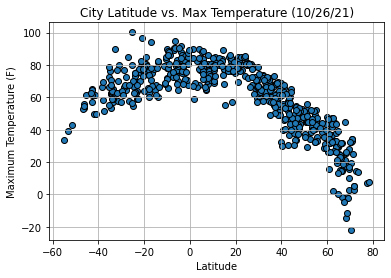

In [31]:
fig, ax = plt.subplots()
ax.scatter(city_weather_df['lat'], city_weather_df['max temperature'], edgecolors='black')
ax.set_ylabel("Maximum Temperature (F)")
ax.set_xlabel("Latitude")
ax.set_title('City Latitude vs. Max Temperature (10/26/21)')
plt.savefig('lat_vs_temperature.png', dpi = 300)
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

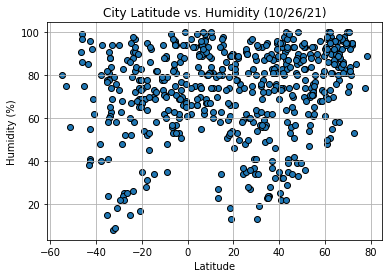

In [32]:
fig, ax = plt.subplots()
ax.scatter(city_weather_df['lat'], city_weather_df['humidity'], edgecolors='black')
ax.set_ylabel("Humidity (%)")
ax.set_xlabel("Latitude")
ax.set_title('City Latitude vs. Humidity (10/26/21)')
plt.savefig('lat_vs_humidity.png', dpi = 300)
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

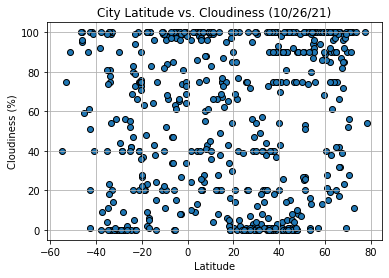

In [33]:
fig, ax = plt.subplots()
ax.scatter(city_weather_df['lat'], city_weather_df['cloudiness'], edgecolors='black')
ax.set_ylabel("Cloudiness (%)")
ax.set_xlabel("Latitude")
ax.set_title('City Latitude vs. Cloudiness (10/26/21)')
plt.savefig('lat_vs_cloudiness.png', dpi = 300)
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

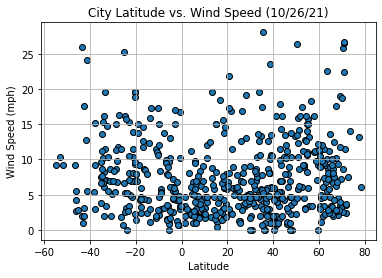

In [34]:
fig, ax = plt.subplots()
ax.scatter(city_weather_df['lat'], city_weather_df['wind speed'], edgecolors='black')
ax.set_ylabel("Wind Speed (mph)")
ax.set_xlabel("Latitude")
ax.set_title('City Latitude vs. Wind Speed (10/26/21)')
plt.savefig('lat_vs_wind_speed.png', dpi = 300)
plt.grid()
plt.show()

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

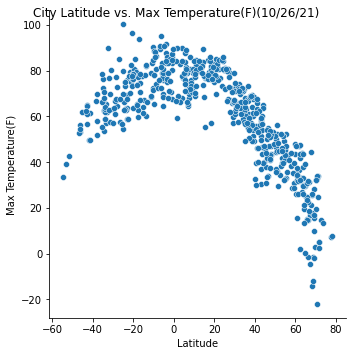

In [38]:
import seaborn as sns

g = sns.relplot(x='lat',y='max temperature',data=city_weather_df, kind='scatter')
g.fig.suptitle('City Latitude vs. Max Temperature(F)(10/26/21)')
g.set(xlabel='Latitude', ylabel='Max Temperature(F)')
plt.savefig('seaborn_lat_humidity.png', dpi=300)
plt.show()

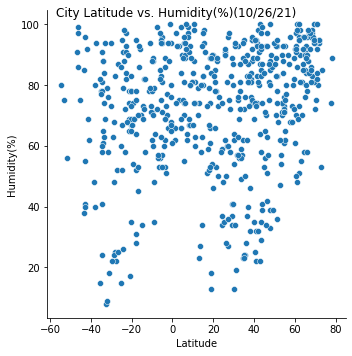

In [39]:
g = sns.relplot(x='lat',y='humidity',data=city_weather_df, kind='scatter')
g.fig.suptitle('City Latitude vs. Humidity(%)(10/26/21)')
g.set(xlabel='Latitude', ylabel='Humidity(%)')
plt.savefig('seaborn_lat_humidity.png', dpi=300)
plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

1. When looking at the latitude vs humidity scatter plot, we can see a bare spot down and towards the middle. This is telling us that closest to the equator, it is not very likely that you'll find any place less that ~60% humidity. 
2. The Latitude vs max temperature graph shows us that the max temperature peaks around the mark where latitude is closest to 0. The further you go away from lat 0, the max temp starts to fall. This can lead us to the conclusion that the equator is much warmer, thus closer to the sun. 
3. The latitude vs cloudiness graph shows a pretty even distribution across the board. This leads me to believe that the distance from the equator does not have large part in the determining factor of cloudiness. It would probably have to to do with the distance to a large body of water. 

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 

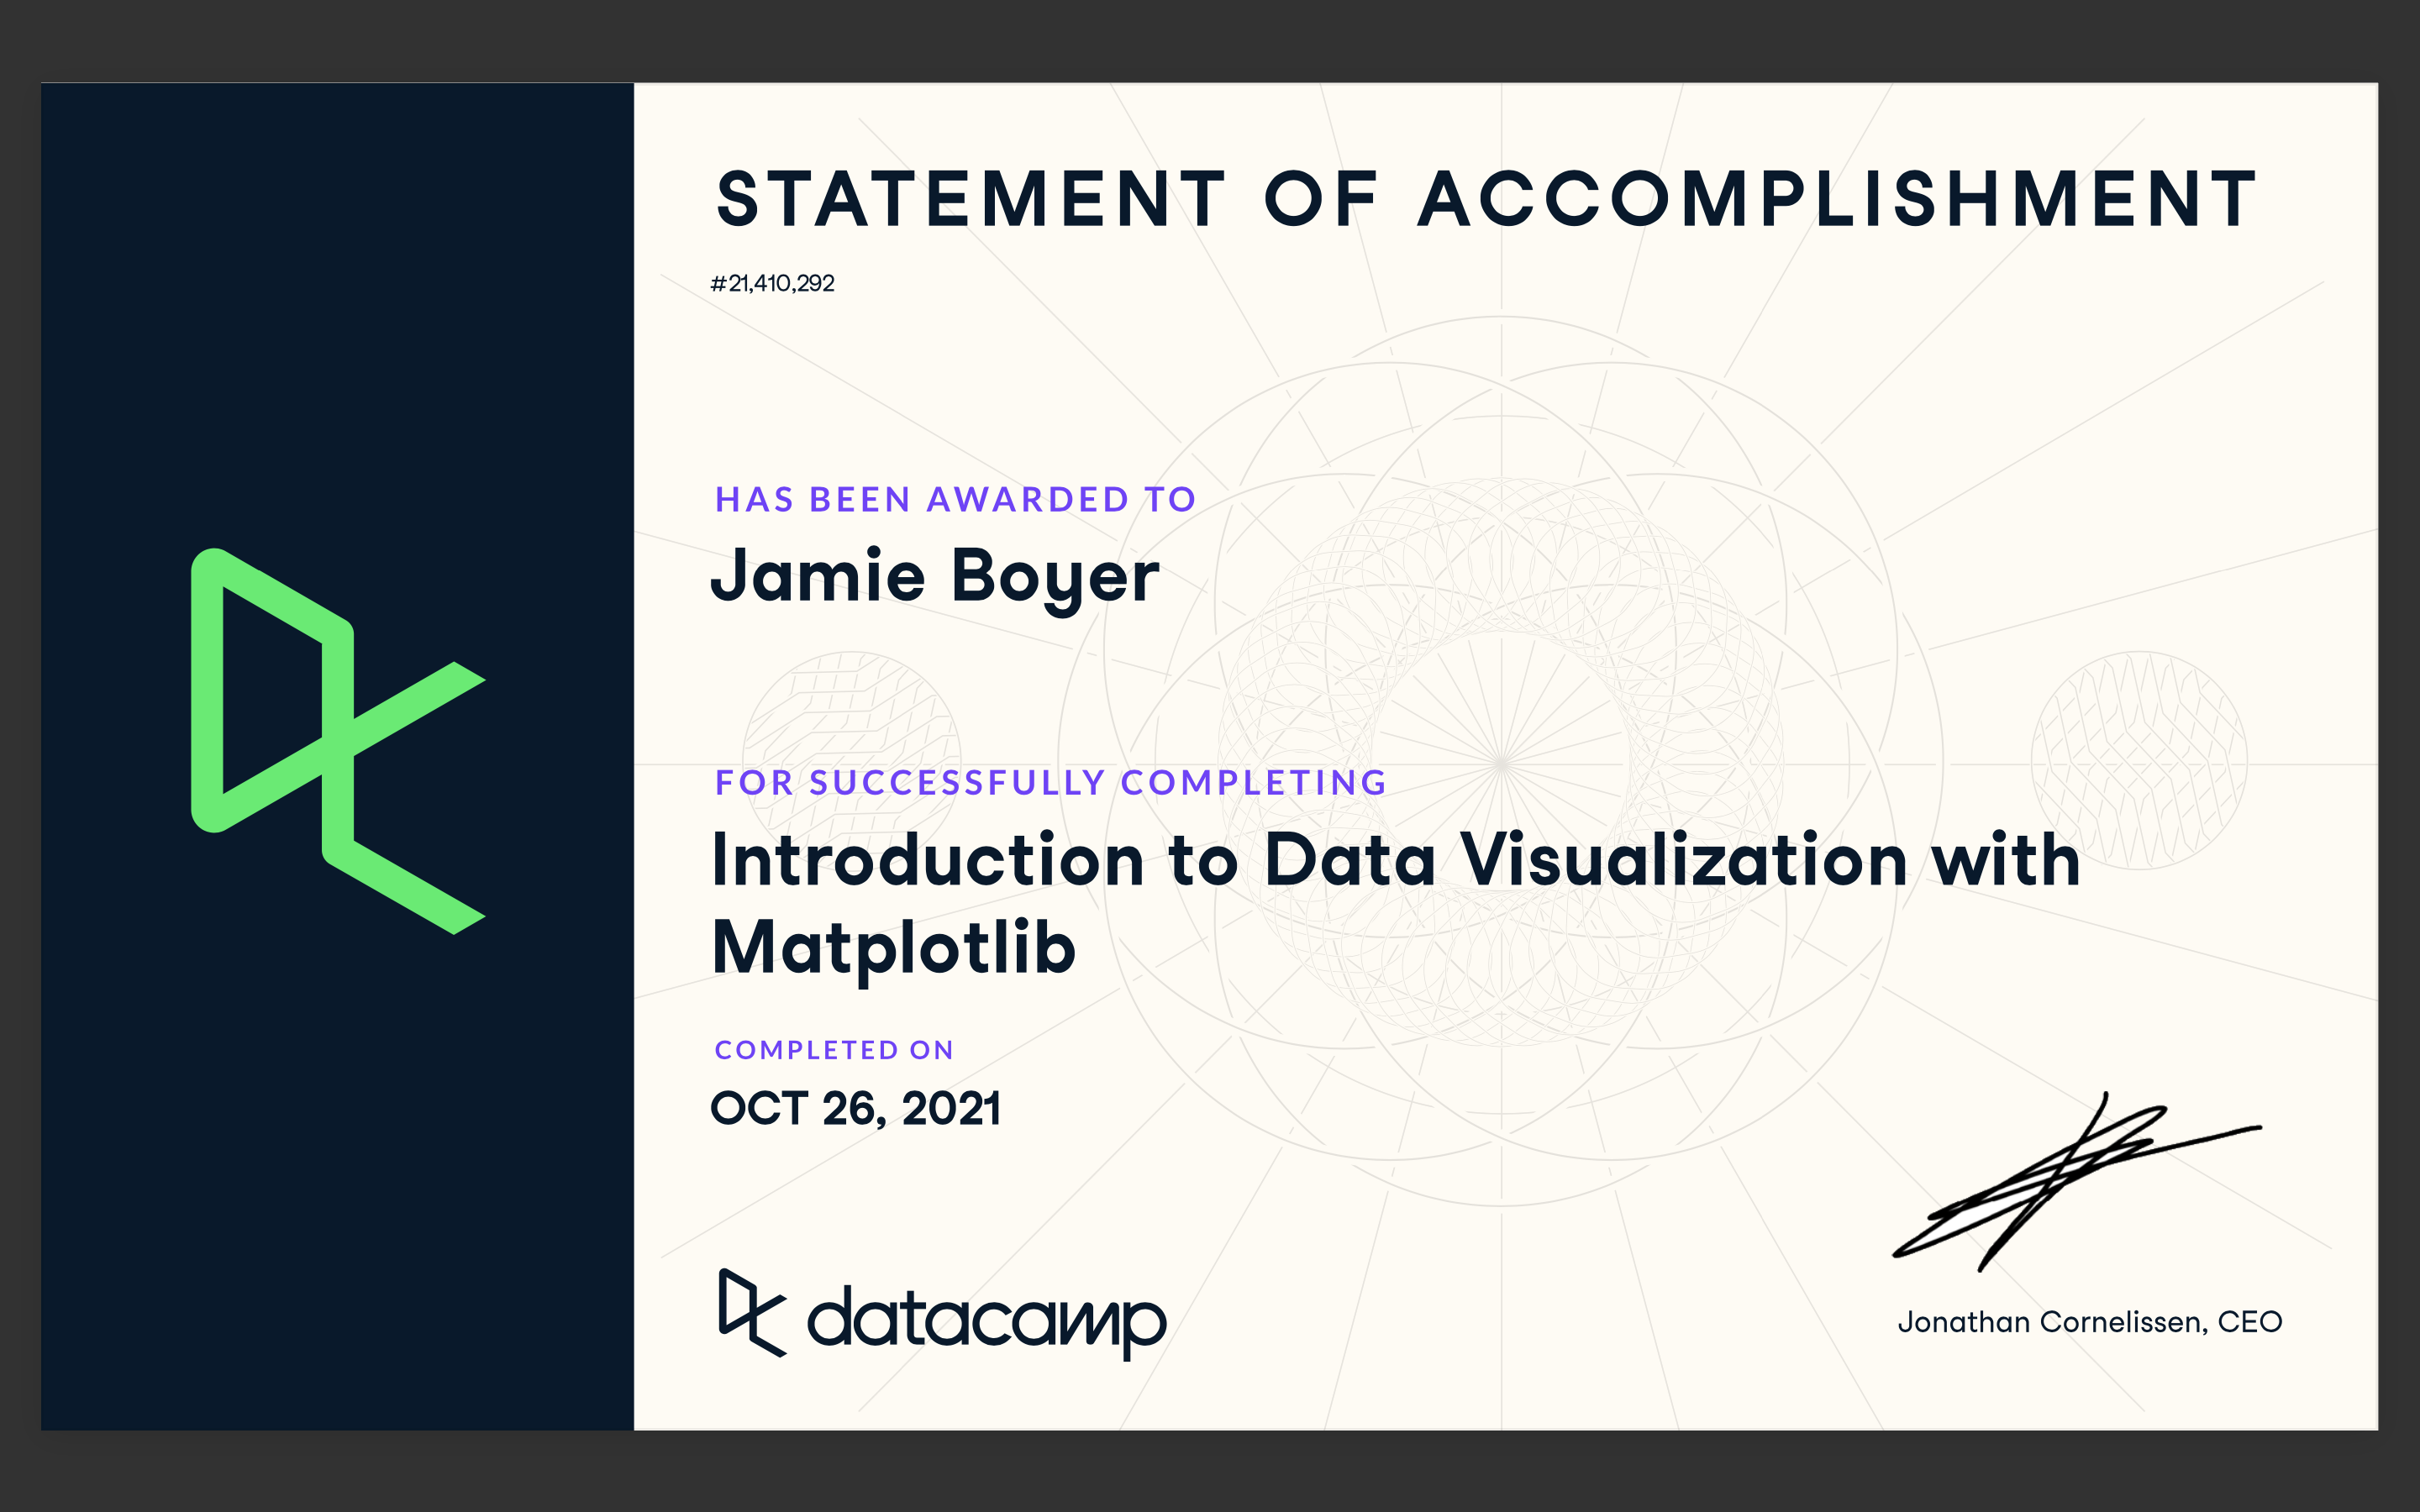

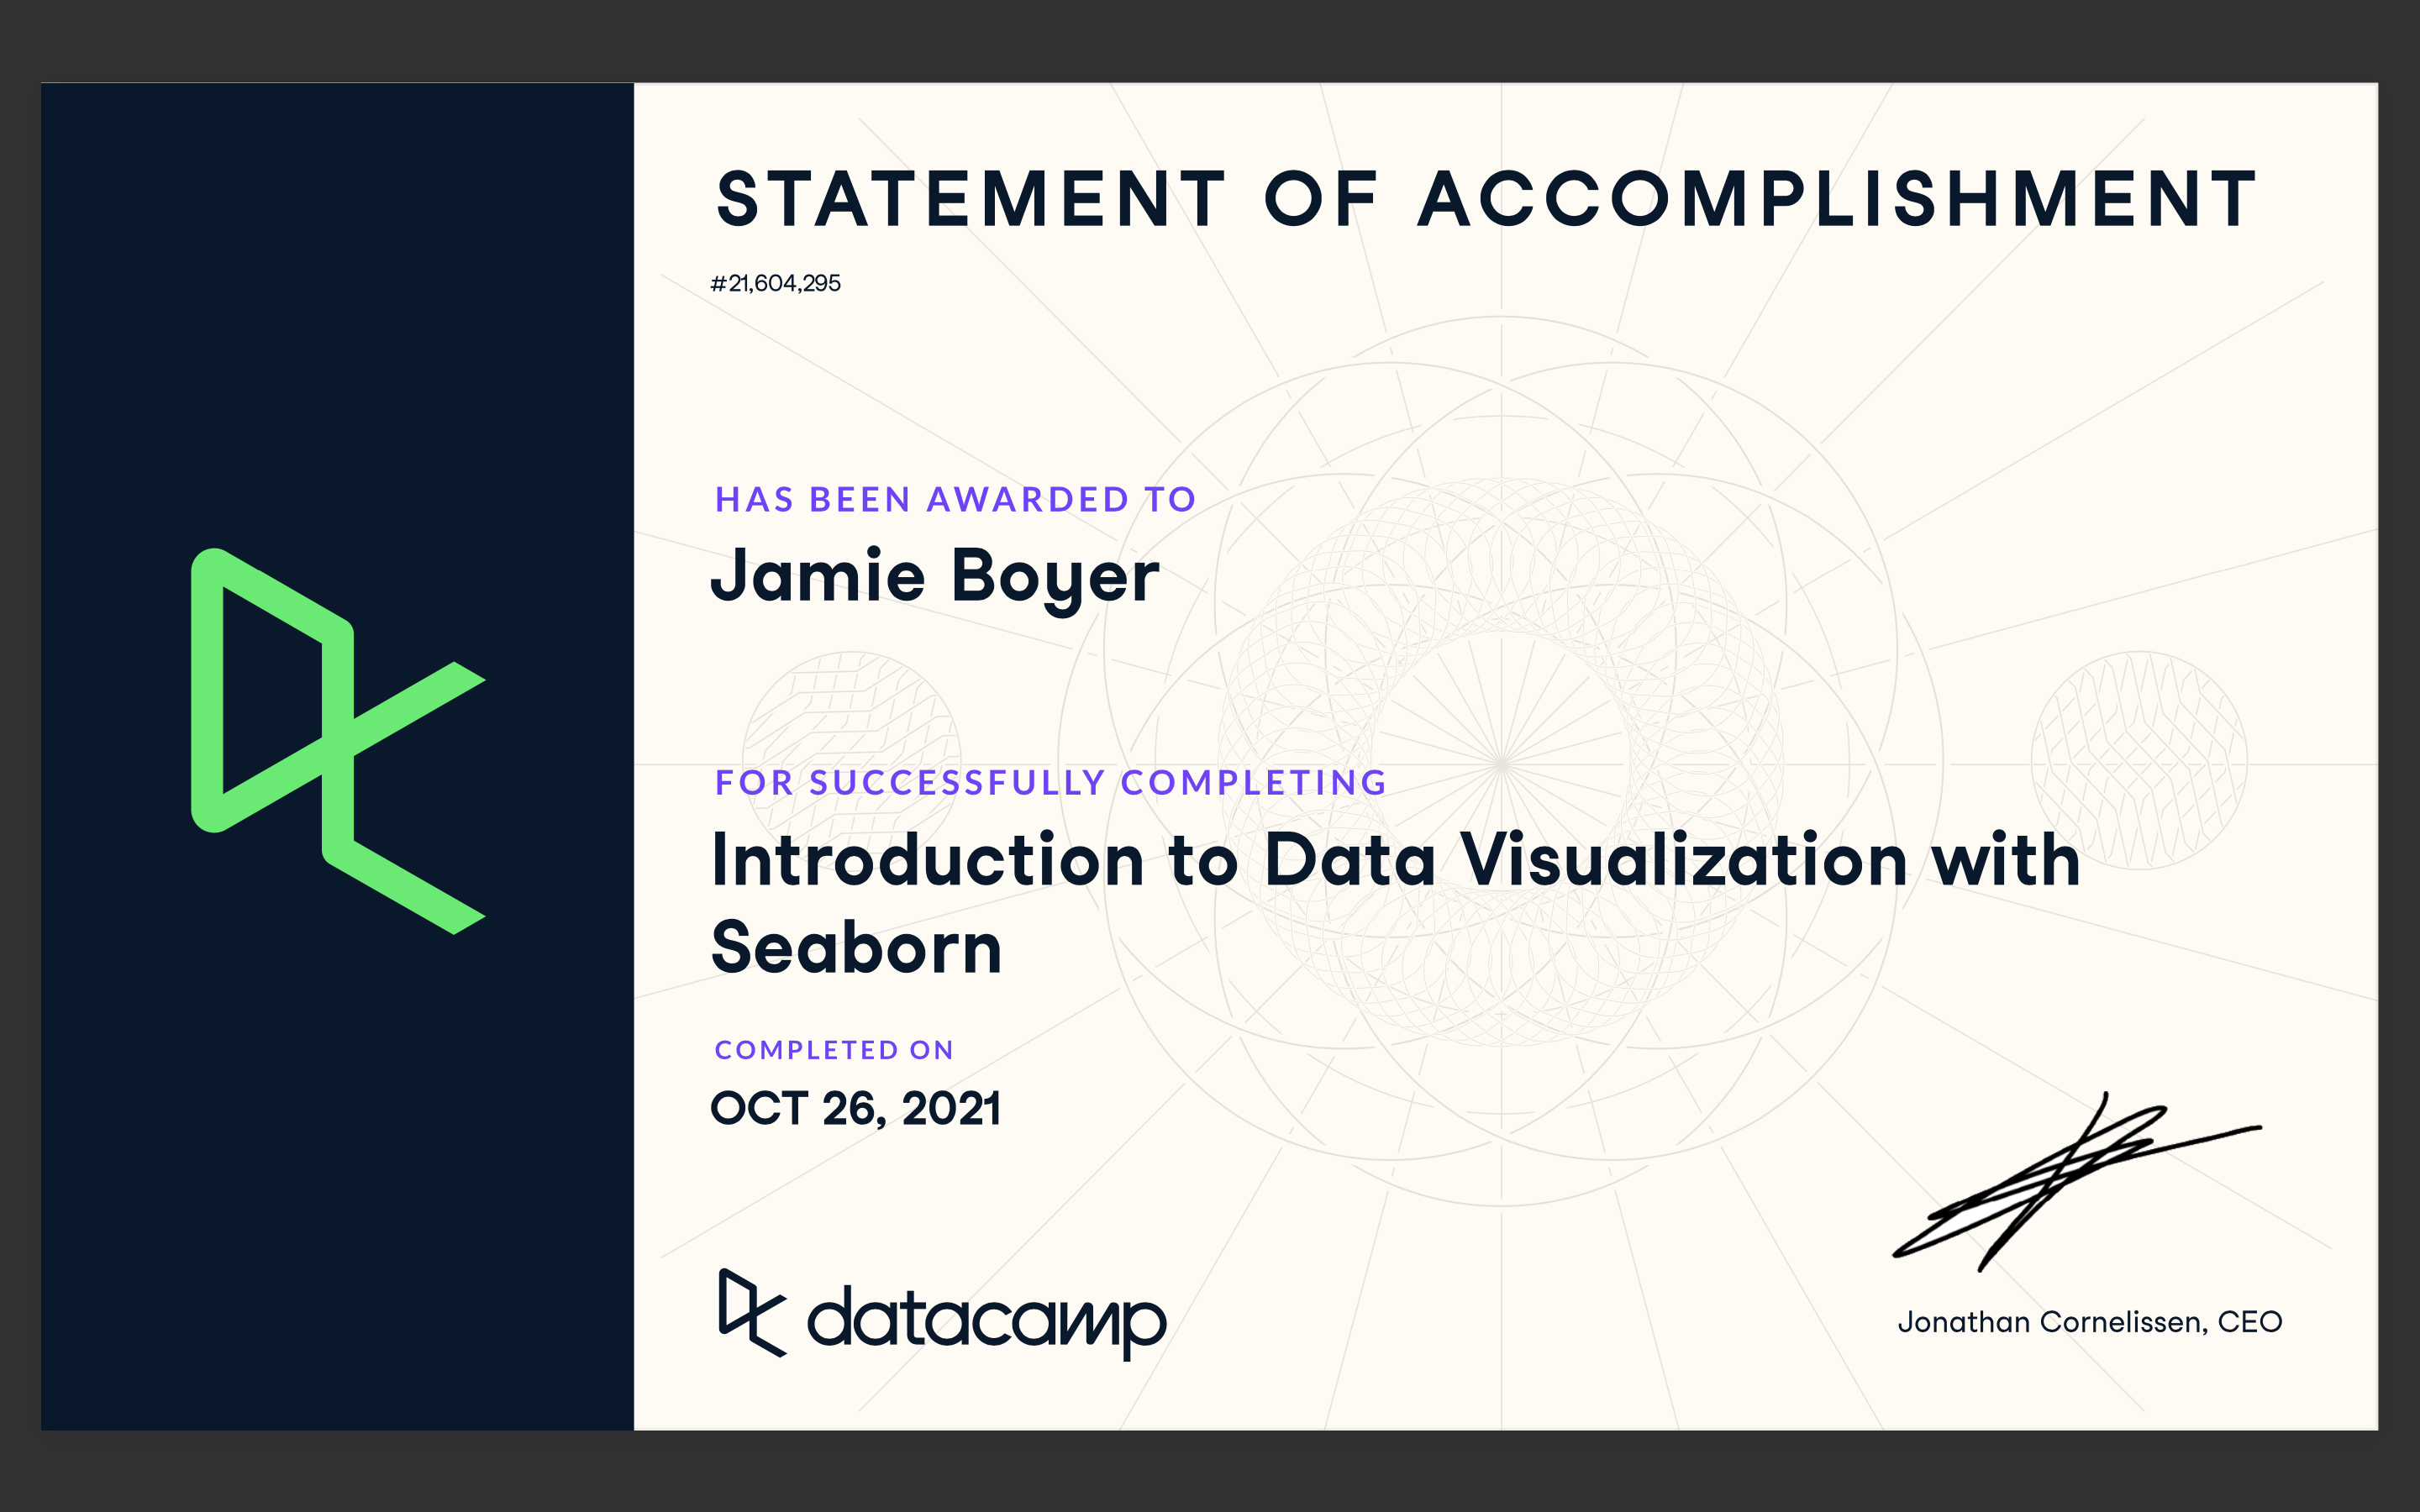